In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from broom import Broom
# Click Dots below for CSV Imports

In [2]:
data = Broom(csv_directory = 'resources').merge_csvs()
data

,Tm,#Bat,BatAge,R/G,G,PA,AB,Adj. Runs,R,H,...,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB.1,Unnamed: 65,#P
0,ARI,45.0,29.1,4.48,60.0,2238.0,1997.0,725.76,269.0,482.0,...,96.00,4.990,1.430,8.8,1.6,4.1,9.10,2.23,429.0,NaN
1,ATL,48.0,28.2,5.80,60.0,2344.0,2074.0,939.60,348.0,556.0,...,110.00,4.420,1.362,8.5,1.2,3.8,8.70,2.30,415.0,NaN
2,BAL,45.0,26.3,4.57,60.0,2242.0,2026.0,740.34,274.0,523.0,...,102.00,4.600,1.313,8.5,1.4,3.3,8.50,2.54,396.0,NaN
3,BOS,47.0,27.0,4.87,60.0,2304.0,2083.0,788.94,292.0,552.0,...,86.00,5.190,1.601,10.1,1.7,4.3,9.20,2.13,466.0,NaN
4,CHC,47.0,27.9,4.42,60.0,2214.0,1918.0,716.04,265.0,422.0,...,109.00,4.180,1.221,7.8,1.3,3.2,9.10,2.87,358.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,STL,43.0,28.8,4.72,162.0,6167.0,5449.0,NaN,764.0,1336.0,...,4.27,1.267,8.000,1.2,3.4,8.7,2.57,1074.00,NaN,23.0
26,TBR,57.0,27.2,4.75,162.0,6285.0,5628.0,NaN,769.0,1427.0,...,3.65,1.171,7.800,1.1,2.8,9.9,3.58,1007.00,NaN,33.0
27,TEX,53.0,28.8,5.00,162.0,6204.0,5540.0,NaN,810.0,1374.0,...,4.84,1.459,9.500,1.5,3.6,8.6,2.37,1162.00,NaN,36.0
28,TOR,61.0,25.9,4.48,162.0,6091.0,5493.0,NaN,726.0,1299.0,...,4.82,1.426,9.100,1.4,3.8,8.3,2.21,1164.00,NaN,39.0


In [9]:
# I do not understand why there are NaaN values. 
# Still figuring out this whole database building thing. 

db_16 = raw_data_16.dropna()

db_17 = raw_data_17.dropna()

db_18 = raw_data_18.dropna()

db_19 = raw_data_19.dropna()

db_20 = raw_data_20.dropna()


In [6]:
# We Only Need Runs Scored & Runs Allowed
# Recall that 2020 was a shortened season -- I went ahead and created an "Assumed Variable" 
# based upon the average runs scored per game vs. 162 games. 
# I understand that this is a significant limitation to this dataset. 
# Suggestions on how to more accurately forecast this statistic are welcome.

In [23]:
# Creating New DB 

db_19.columns

Index(['Tm', '#Bat', 'BatAge', 'R/G', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B',
       'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+',
       'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB', '#P', 'PAge', 'RA/G', 'W',
       'L', 'W-L%', 'ERA', 'G.1', 'GS', 'GF', 'CG', 'tSho', 'cSho', 'SV', 'IP',
       'H.1', 'R.1', 'ER', 'HR.1', 'BB.1', 'IBB.1', 'SO.1', 'HBP.1', 'BK',
       'WP', 'BF', 'ERA+', 'FIP', 'WHIP', 'H9', 'HR9', 'BB9', 'SO9', 'SO/W',
       'LOB.1'],
      dtype='object')

In [25]:
rs_20 = db_20['Adj. Runs']
ra_20 = db_20['Adj. Runs.1']
teams = db_20['Tm']

rs_19 = db_19['R']
ra_19 = db_19['R.1']

rs_18 = db_18['R']
ra_18 = db_18['R.1']

rs_17 = db_17['R']
ra_17 = db_17['R.1']

rs_16 = db_16['R']
ra_16 = db_16['R.1']

In [31]:
df = pd.DataFrame({
    
    "Teams": teams,
    "Runs Scored '20": rs_20,
    "Runs Allowed '20": ra_20,
    "Runs Scored '19": rs_19,
    "Runs Allowed '19": ra_19,
    "Runs Scored '18": rs_18,
    "Runs Allowed '18": ra_18,
    "Runs Scored '17": rs_17,
    "Runs Allowed '17": ra_17,
    "Runs Allowed '16": ra_16,
    "Runs Scored '16": rs_16
    
})

df.head()

,Teams,Runs Scored '20,Runs Allowed '20,Runs Scored '19,Runs Allowed '19,Runs Scored '18,Runs Allowed '18,Runs Scored '17,Runs Allowed '17,Runs Allowed '16,Runs Scored '16
0,ARI,725.76,797.04,813.0,743.0,693.0,644.0,812.0,659.0,890.0,752.0
1,ATL,939.60,777.60,855.0,743.0,759.0,657.0,732.0,821.0,779.0,649.0
2,BAL,740.34,793.80,729.0,981.0,622.0,892.0,743.0,841.0,715.0,744.0
3,BOS,788.94,947.70,901.0,828.0,876.0,647.0,785.0,668.0,694.0,878.0
4,CHC,716.04,648.00,814.0,717.0,761.0,645.0,822.0,695.0,556.0,808.0


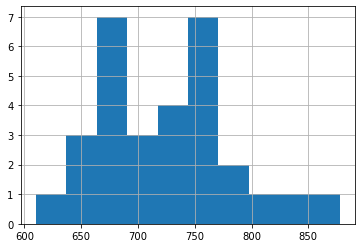

In [64]:
# Calculations

# Bill James' Pythag Win % is derived from (Runs Scored ^ 2 / [ Runs Scored^2 * Runs Allowed^2])



